# Сессия №1

## Модуль №1 загрузка данных

Устанавливаем настройки для отображения датасета полностью при этом импортирую нужные для загрузки и обработки данных библиотеки

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 700)
pd.set_option('display.max_rows', 700)

### Загружаем нашу таблицу с данными для последующей обработки полученной информации

In [3]:
df = pd.read_csv(r'C:\Users\nicka\Downloads\Telegram Desktop\Credit Score Classification Dataset.csv',sep = ',').sort_values('Age') # Сортируем данные по возрасту т.к. так будет удобнее рассматривать наши данные
df.reset_index(inplace=True,drop=True)
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
2,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
3,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
4,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
5,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
6,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
7,25,Female,62500,Bachelor's Degree,Single,0,Rented,Average
8,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
9,26,Female,47500,Associate's Degree,Single,0,Rented,Average


### Выводим уникальные значения для каждого столбца чтобы оценить параметры и найти аномалии если они присутствуют

In [4]:
for col in df.columns:
    print(f'{col}:')
    print(df[col].unique())

Age:
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Gender:
['Female' 'Male']
Income:
[ 50000  60000  57500  55000  62500  47500  45000  40000  37500  35000
  75000  32500  30000  27500  68000  25000 117500 112500 105000 100000
  65000  70000  67500  95000  85000  52500  82000  90000  80000  72500
  77500 142500 125000 130000 110000 115000 120000  92500  87500  97500
 102500  82500 150000 162500 155000 160000 145000 140000 135000 137500
 127500 122500]
Education:
["Bachelor's Degree" "Associate's Degree" 'High School Diploma'
 'Doctorate' "Master's Degree"]
Marital Status:
['Single' 'Married']
Number of Children:
[0 1 2 3]
Home Ownership:
['Rented' 'Owned']
Credit Score:
['High' 'Average' 'Low']


Видим что все данные соответствуют друг другу, нету никаких опечаток в строковых значениях и визуальных аномалий в численных данных

Визуализируем пропущенные значения в данных для нахождения и последующей обработки

<Axes: >

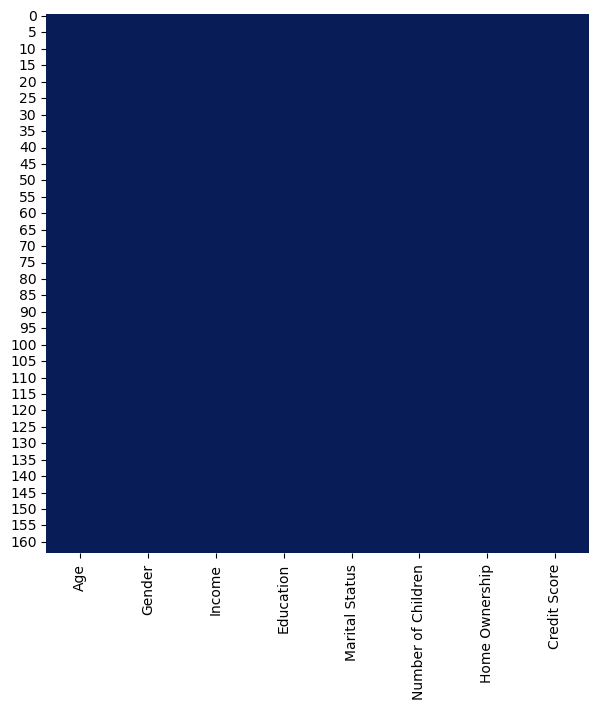

In [5]:
# Импортируем библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
#------------------------------------
plt.figure(figsize = (7,7))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

Видим, что пропущенных значений не существует

### Избавляемся от дубликатов в строках нашего dataframe

данные для обучения должны быть индивидуальными, и должны отражать корреляцию различных элементов к целевой переменной с различных сторон

In [7]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True,drop = True)
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
2,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
3,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
4,25,Female,62500,Bachelor's Degree,Single,0,Rented,Average
5,26,Female,47500,Associate's Degree,Single,0,Rented,Average
6,26,Female,50000,Associate's Degree,Single,0,Rented,Average
7,26,Female,55000,Bachelor's Degree,Married,1,Owned,Average
8,26,Female,45000,Associate's Degree,Single,0,Rented,Average
9,26,Female,40000,Associate's Degree,Single,0,Rented,Average


In [8]:
df_cop = df.copy()

Перед тем как закодировать данные исследуем таблицу на выбросы и удалим строки с аномальными значениями

In [9]:
df_cop.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,102.0,38.950980,8.709136,25.0,31.0,39.0,46.75,53.0
Income,102.0,88308.823529,32417.071969,25000.0,65000.0,86250.0,110000.00,162500.0
Number of Children,102.0,0.656863,0.895479,0.0,0.0,0.0,1.00,3.0


<Axes: >

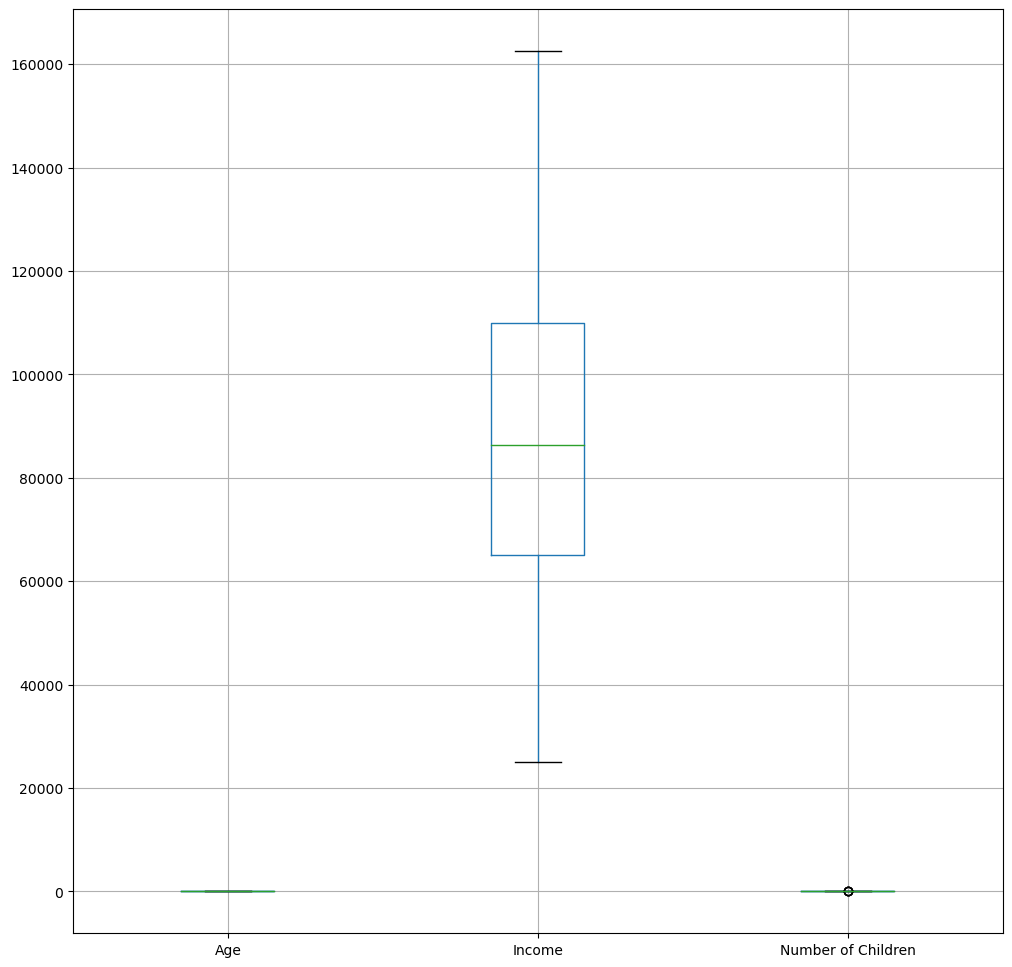

In [10]:
plt.figure(figsize = (12,12))
df_cop.boxplot()

И избавляемся от выбросов по формуле

In [11]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = np.percentile(work_val, 25, method= 'midpoint')
    Q3 = np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).drop(columns = 'Number of Children').columns:
            if len(df[col].unique()) != 2:
                up,low = quantiles(df[col])
                print(f'{col}: up = {up}, low = {low}')
                df[col] = df[col].drop(index = (df[col][(df[col] < low) | (df[col] > up)]).index) 

    return df.dropna().reset_index(drop=True)

In [12]:
df_cop = anti_emmi(df_cop)
df_cop

Age: up = 69.75, low = 7.75
Income: up = 177500.0, low = -2500.0


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
2,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
3,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
4,25,Female,62500,Bachelor's Degree,Single,0,Rented,Average
5,26,Female,47500,Associate's Degree,Single,0,Rented,Average
6,26,Female,50000,Associate's Degree,Single,0,Rented,Average
7,26,Female,55000,Bachelor's Degree,Married,1,Owned,Average
8,26,Female,45000,Associate's Degree,Single,0,Rented,Average
9,26,Female,40000,Associate's Degree,Single,0,Rented,Average


In [13]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = morph.normal_forms(doc)[0]
    return doc

for col in df_cop.select_dtypes(include = ["object"]).columns:
    df_cop[col] = df_cop[col].apply(lemmatize)

In [14]:
df_cop

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,female,50000,bachelor's degree,single,0,rented,high
1,25,female,60000,bachelor's degree,single,0,rented,average
2,25,female,57500,bachelor's degree,single,0,rented,average
3,25,female,55000,bachelor's degree,single,0,rented,average
4,25,female,62500,bachelor's degree,single,0,rented,average
5,26,female,47500,associate's degree,single,0,rented,average
6,26,female,50000,associate's degree,single,0,rented,average
7,26,female,55000,bachelor's degree,married,1,owned,average
8,26,female,45000,associate's degree,single,0,rented,average
9,26,female,40000,associate's degree,single,0,rented,average


Кодируем строковую информацию для использовании её при исследовании корреляций и последующем обучении модели

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_gend = le.fit(df_cop.Gender)
le_gend.classes_

array(['female', 'male'], dtype=object)

In [16]:
le = LabelEncoder()
le_edu = le.fit(df_cop.Education)
le_edu.classes_

array(["associate's degree", "bachelor's degree", 'doctorate',
       'high school diploma', "master's degree"], dtype=object)

In [17]:
le = LabelEncoder()
le_mar = le.fit(df_cop["Marital Status"])
le_mar.classes_

array(['married', 'single'], dtype=object)

In [18]:
le = LabelEncoder()
le_h_own = le.fit(df_cop["Home Ownership"])
le_h_own.classes_

array(['owned', 'rented'], dtype=object)

In [19]:
le = LabelEncoder()
le_creds = le.fit(df_cop["Credit Score"])
le_creds.classes_

array(['average', 'high', 'low'], dtype=object)

In [20]:
df_cop.Gender = le_gend.transform(df_cop.Gender)
df_cop.Education = le_edu.transform(df_cop.Education)
df_cop["Marital Status"] = le_mar.transform(df_cop["Marital Status"])
df_cop["Home Ownership"] = le_h_own.transform(df_cop["Home Ownership"])
df_cop["Credit Score"]= le_creds.transform(df_cop["Credit Score"])

In [21]:
df_cop

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,25,0,60000,1,1,0,1,0
2,25,0,57500,1,1,0,1,0
3,25,0,55000,1,1,0,1,0
4,25,0,62500,1,1,0,1,0
5,26,0,47500,0,1,0,1,0
6,26,0,50000,0,1,0,1,0
7,26,0,55000,1,0,1,0,0
8,26,0,45000,0,1,0,1,0
9,26,0,40000,0,1,0,1,0


Также выведем карту корреляций наших значений и сделаем выводы на основе этих данных

<Axes: >

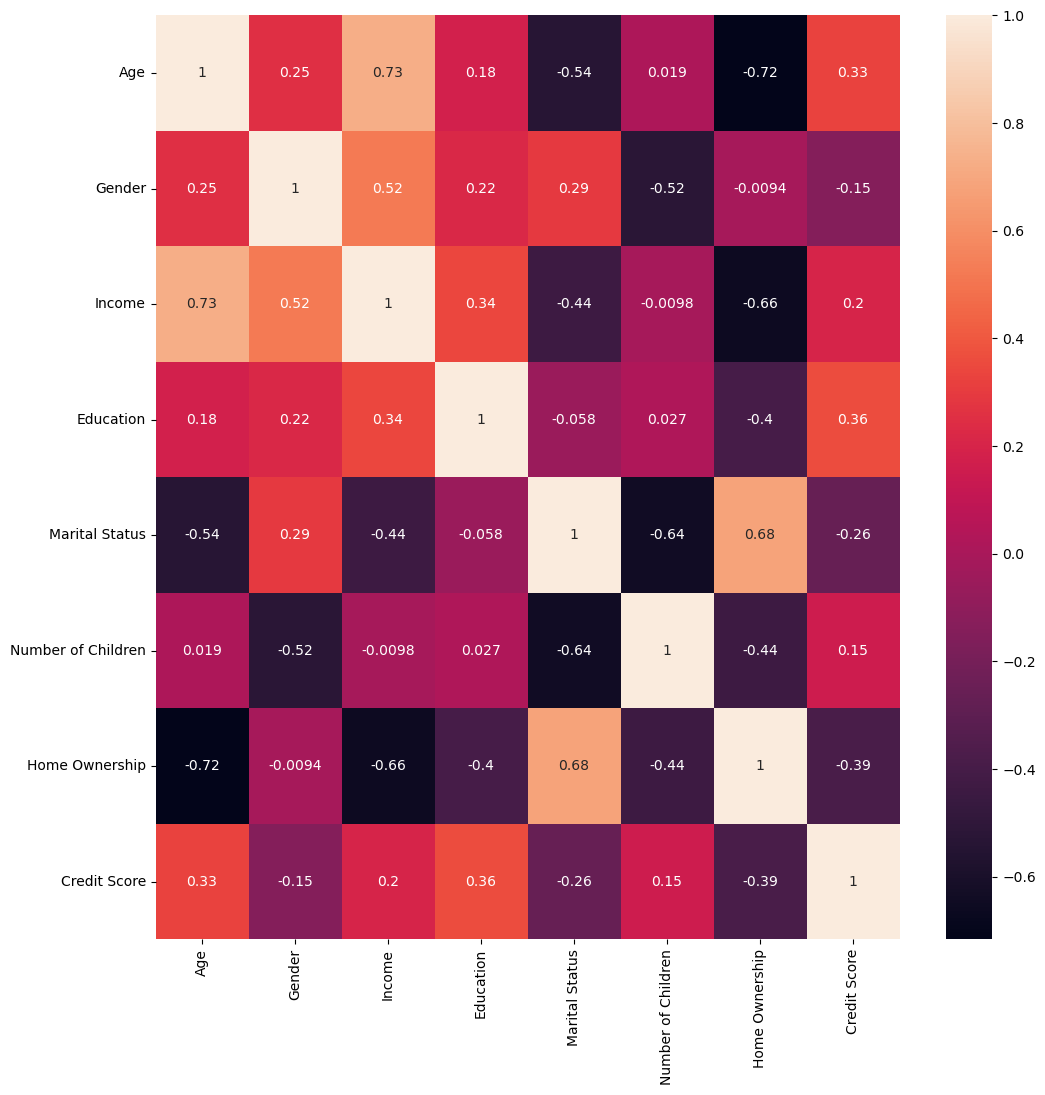

In [22]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df_cop.corr(),annot=True)

In [ ]:
Рассмотрим зависимость Age, Income и Gender, ведь их корреляция очень высока, а когда две независимые переменные сильно коррелированы, это приводит к проблеме, известной как мультиколлинеарность

In [34]:
df_cop.groupby(['Income','Gender']).mean()['Age']

Income  Gender
25000   0         29.000000
27500   0         29.000000
30000   0         28.000000
32500   0         28.000000
35000   0         27.000000
37500   0         27.000000
40000   0         26.000000
45000   0         26.000000
        1         34.000000
47500   0         26.000000
        1         34.000000
50000   0         25.500000
        1         33.000000
52500   1         33.000000
55000   0         25.500000
        1         32.000000
57500   0         25.000000
        1         32.000000
60000   0         32.000000
        1         31.000000
62500   0         32.000000
65000   0         43.500000
        1         31.000000
67500   0         38.000000
        1         31.000000
68000   0         29.000000
70000   0         42.500000
        1         31.000000
72500   0         37.000000
75000   0         36.000000
        1         36.000000
77500   0         43.000000
80000   0         35.500000
        1         43.000000
82000   0         33.000000
82500

Как можем увидеть доход практически напрямую зависит от возраста и пола, чем больше возраст, тем велика вероятность больше и зароботок

<Axes: >

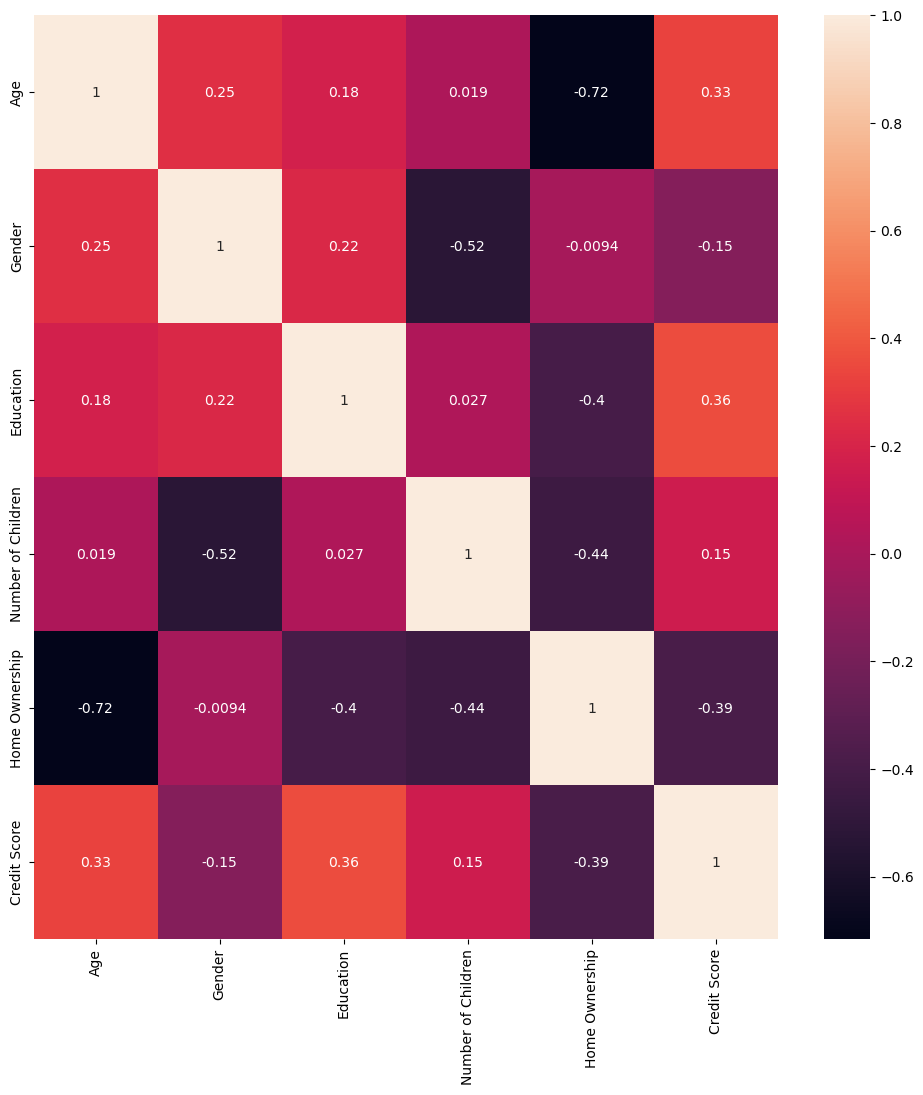

In [37]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df_cop.drop(columns=['Income','Marital Status']).corr(),annot=True)

In [40]:
from sklearn.model_selection import train_test_split
X = df_cop.drop(columns = ['Credit Score'])
y = df_cop['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [43]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

0:	learn: 0.9965220	test: 1.0207098	best: 1.0207098 (0)	total: 162ms	remaining: 1m 4s
1:	learn: 0.9271169	test: 0.9604659	best: 0.9604659 (1)	total: 163ms	remaining: 32.4s
2:	learn: 0.8604354	test: 0.9060587	best: 0.9060587 (2)	total: 163ms	remaining: 21.6s
3:	learn: 0.8150419	test: 0.8672298	best: 0.8672298 (3)	total: 164ms	remaining: 16.2s
4:	learn: 0.7676720	test: 0.8261430	best: 0.8261430 (4)	total: 165ms	remaining: 13s
5:	learn: 0.7044527	test: 0.7739227	best: 0.7739227 (5)	total: 165ms	remaining: 10.9s
6:	learn: 0.6620290	test: 0.7355427	best: 0.7355427 (6)	total: 166ms	remaining: 9.32s
7:	learn: 0.6306613	test: 0.7095392	best: 0.7095392 (7)	total: 167ms	remaining: 8.17s
8:	learn: 0.5985257	test: 0.6764002	best: 0.6764002 (8)	total: 167ms	remaining: 7.27s
9:	learn: 0.5616851	test: 0.6386445	best: 0.6386445 (9)	total: 168ms	remaining: 6.55s
10:	learn: 0.5341682	test: 0.6191772	best: 0.6191772 (10)	total: 169ms	remaining: 5.96s
11:	learn: 0.4935256	test: 0.5785986	best: 0.5785986 (

316:	learn: 0.0111295	test: 0.1812580	best: 0.1788326 (216)	total: 346ms	remaining: 90.5ms
317:	learn: 0.0110880	test: 0.1812710	best: 0.1788326 (216)	total: 347ms	remaining: 89.4ms
318:	learn: 0.0110597	test: 0.1813155	best: 0.1788326 (216)	total: 347ms	remaining: 88.1ms
319:	learn: 0.0110182	test: 0.1812450	best: 0.1788326 (216)	total: 348ms	remaining: 86.9ms
320:	learn: 0.0109776	test: 0.1812777	best: 0.1788326 (216)	total: 348ms	remaining: 85.7ms
321:	learn: 0.0109316	test: 0.1813713	best: 0.1788326 (216)	total: 349ms	remaining: 84.5ms
322:	learn: 0.0108862	test: 0.1814198	best: 0.1788326 (216)	total: 350ms	remaining: 83.4ms
323:	learn: 0.0108368	test: 0.1814747	best: 0.1788326 (216)	total: 350ms	remaining: 82.2ms
324:	learn: 0.0107986	test: 0.1814676	best: 0.1788326 (216)	total: 351ms	remaining: 81ms
325:	learn: 0.0107646	test: 0.1814731	best: 0.1788326 (216)	total: 352ms	remaining: 79.8ms
326:	learn: 0.0107281	test: 0.1815771	best: 0.1788326 (216)	total: 352ms	remaining: 78.6ms
3

In [44]:
from sklearn.model_selection import train_test_split
X = df_cop.drop(columns = ['Credit Score','Income'])
y = df_cop['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

0:	learn: 0.9945401	test: 1.0043176	best: 1.0043176 (0)	total: 573us	remaining: 229ms
1:	learn: 0.9181998	test: 0.9350535	best: 0.9350535 (1)	total: 1.34ms	remaining: 266ms
2:	learn: 0.8643001	test: 0.8903569	best: 0.8903569 (2)	total: 1.98ms	remaining: 263ms
3:	learn: 0.8112871	test: 0.8458874	best: 0.8458874 (3)	total: 2.61ms	remaining: 259ms
4:	learn: 0.7602679	test: 0.7989763	best: 0.7989763 (4)	total: 2.99ms	remaining: 236ms
5:	learn: 0.7240089	test: 0.7691458	best: 0.7691458 (5)	total: 3.52ms	remaining: 231ms
6:	learn: 0.6882686	test: 0.7394779	best: 0.7394779 (6)	total: 4.17ms	remaining: 234ms
7:	learn: 0.6423952	test: 0.6953339	best: 0.6953339 (7)	total: 4.47ms	remaining: 219ms
8:	learn: 0.6119395	test: 0.6690362	best: 0.6690362 (8)	total: 5.05ms	remaining: 219ms
9:	learn: 0.5726088	test: 0.6417515	best: 0.6417515 (9)	total: 5.48ms	remaining: 214ms
10:	learn: 0.5419567	test: 0.6161802	best: 0.6161802 (10)	total: 6.06ms	remaining: 214ms
11:	learn: 0.5230161	test: 0.5990308	best:

354:	learn: 0.0135899	test: 0.4393483	best: 0.3248025 (63)	total: 178ms	remaining: 22.6ms
355:	learn: 0.0135461	test: 0.4395704	best: 0.3248025 (63)	total: 179ms	remaining: 22.1ms
356:	learn: 0.0134927	test: 0.4401331	best: 0.3248025 (63)	total: 179ms	remaining: 21.6ms
357:	learn: 0.0134388	test: 0.4406425	best: 0.3248025 (63)	total: 180ms	remaining: 21.1ms
358:	learn: 0.0133945	test: 0.4409104	best: 0.3248025 (63)	total: 180ms	remaining: 20.6ms
359:	learn: 0.0133530	test: 0.4411809	best: 0.3248025 (63)	total: 181ms	remaining: 20.1ms
360:	learn: 0.0133059	test: 0.4413814	best: 0.3248025 (63)	total: 181ms	remaining: 19.6ms
361:	learn: 0.0132540	test: 0.4415905	best: 0.3248025 (63)	total: 182ms	remaining: 19.1ms
362:	learn: 0.0132123	test: 0.4417232	best: 0.3248025 (63)	total: 182ms	remaining: 18.6ms
363:	learn: 0.0131718	test: 0.4418910	best: 0.3248025 (63)	total: 183ms	remaining: 18.1ms
364:	learn: 0.0131237	test: 0.4422661	best: 0.3248025 (63)	total: 184ms	remaining: 17.6ms
365:	learn

In [47]:
from sklearn.model_selection import train_test_split
X = df_cop.drop(columns = ['Credit Score','Marital Status','Home Ownership'])
y = df_cop['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=400, 
    learning_rate=0.1,
)
model.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=True
)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

0:	learn: 1.0148986	test: 1.0321915	best: 1.0321915 (0)	total: 946us	remaining: 377ms
1:	learn: 0.9393372	test: 0.9589382	best: 0.9589382 (1)	total: 1.56ms	remaining: 311ms
2:	learn: 0.8891846	test: 0.9210823	best: 0.9210823 (2)	total: 2.08ms	remaining: 275ms
3:	learn: 0.8295872	test: 0.8707090	best: 0.8707090 (3)	total: 2.38ms	remaining: 236ms
4:	learn: 0.7858560	test: 0.8357554	best: 0.8357554 (4)	total: 3.01ms	remaining: 238ms
5:	learn: 0.7362414	test: 0.7880307	best: 0.7880307 (5)	total: 3.54ms	remaining: 233ms
6:	learn: 0.6915062	test: 0.7532999	best: 0.7532999 (6)	total: 4.21ms	remaining: 237ms
7:	learn: 0.6563759	test: 0.7237106	best: 0.7237106 (7)	total: 4.87ms	remaining: 239ms
8:	learn: 0.6224434	test: 0.6897271	best: 0.6897271 (8)	total: 5.46ms	remaining: 237ms
9:	learn: 0.5920959	test: 0.6582994	best: 0.6582994 (9)	total: 5.73ms	remaining: 223ms
10:	learn: 0.5574747	test: 0.6281453	best: 0.6281453 (10)	total: 6.3ms	remaining: 223ms
11:	learn: 0.5321936	test: 0.6079744	best: 

273:	learn: 0.0131249	test: 0.1903836	best: 0.1882397 (170)	total: 176ms	remaining: 80.8ms
274:	learn: 0.0130772	test: 0.1904649	best: 0.1882397 (170)	total: 177ms	remaining: 80.3ms
275:	learn: 0.0130240	test: 0.1905032	best: 0.1882397 (170)	total: 177ms	remaining: 79.6ms
276:	learn: 0.0129603	test: 0.1905094	best: 0.1882397 (170)	total: 178ms	remaining: 79ms
277:	learn: 0.0128997	test: 0.1905744	best: 0.1882397 (170)	total: 179ms	remaining: 78.4ms
278:	learn: 0.0128400	test: 0.1906552	best: 0.1882397 (170)	total: 179ms	remaining: 77.8ms
279:	learn: 0.0127898	test: 0.1906828	best: 0.1882397 (170)	total: 180ms	remaining: 77.2ms
280:	learn: 0.0127282	test: 0.1906825	best: 0.1882397 (170)	total: 181ms	remaining: 76.6ms
281:	learn: 0.0126782	test: 0.1907157	best: 0.1882397 (170)	total: 182ms	remaining: 76ms
282:	learn: 0.0126409	test: 0.1907564	best: 0.1882397 (170)	total: 182ms	remaining: 75.3ms
283:	learn: 0.0125915	test: 0.1907884	best: 0.1882397 (170)	total: 183ms	remaining: 74.7ms
284